In [1]:
#!pip install imutils

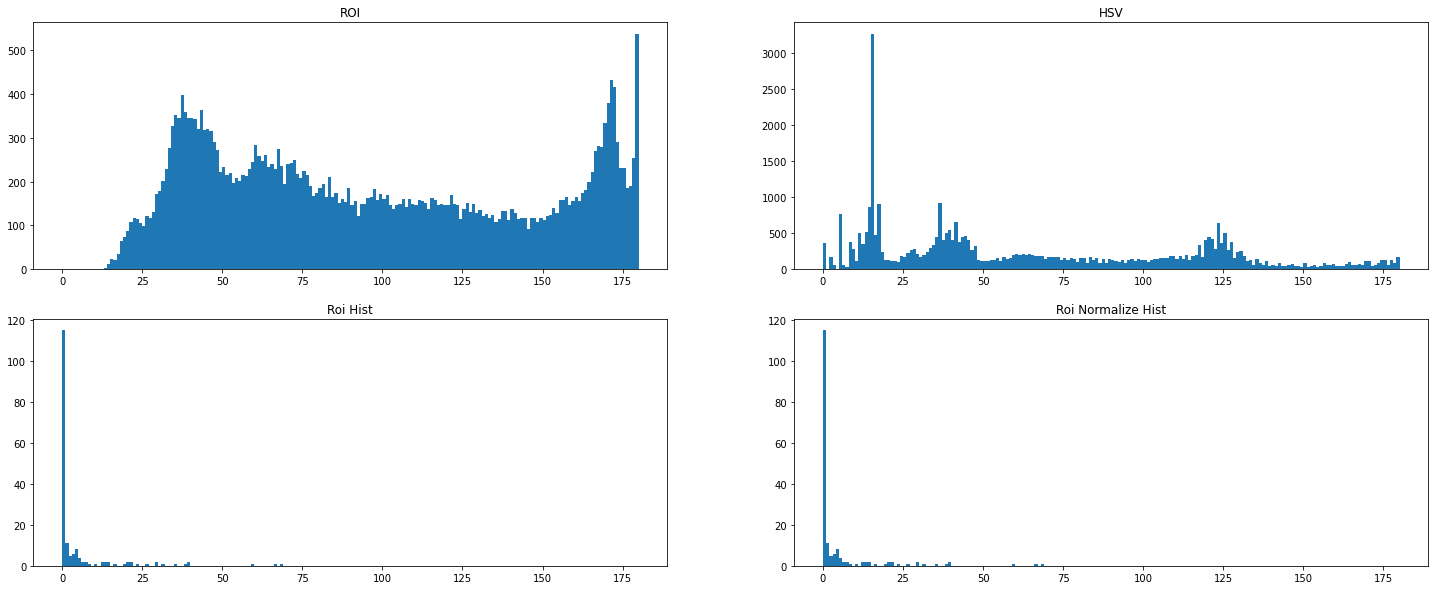

(255.0, 0.0, 255.0, 0.0)

In [1]:
import time
import cv2
from imutils.video import VideoStream
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread("Images/deneme.jpeg")

#bbox = cv2.selectROI(img)
#print(bbox)

x,y,w,h = (297, 158, 92, 153)

roi = img[y:y+h,x:x+w]

hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])

roi_normalize = cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

plt.figure(figsize = (25,10))

plt.subplot(221)
plt.hist(roi.ravel(),180,[0,180])
plt.title("ROI")

plt.subplot(222)
plt.hist(hsv_roi.ravel(),180,[0,180])
plt.title("HSV")

plt.subplot(223)
plt.hist(roi_hist.ravel(),180,[0,180])
plt.title("Roi Hist")

plt.subplot(224)
plt.hist(roi_normalize.ravel(),180,[0,180])
plt.title("Roi Normalize Hist")

plt.show()

roi_normalize.max(),roi_normalize.min(),roi_hist.max(),roi_hist.min()

In [33]:
import time
import cv2
from imutils.video import VideoStream
import matplotlib.pyplot as plt
%matplotlib inline

############################

# Mean Shift

############################

cap = VideoStream(src = 0).start()
time.sleep(1.0)

cap = cv2.VideoCapture(0)
conn, frame = cap.read()

bbox = cv2.selectROI(frame)
x,y,w,h = bbox
track_window = (x,y,w,h)
print(track_window)

roi = frame[y:y+h,x:x+w] # RGB -> BGR
#cv2.imshow("ROI",roi)
#cv2.waitKey(0)

# HSV
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

#cv2.imshow("ROI HSV",hsv_roi)
#cv2.waitKey(0)

roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])

# 0 - 255 
roi_normalize = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

parameters = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT , 10, 1)

while True:
    
    conn, frame = cap.read()

    if conn == True:
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        dst = cv2.calcBackProject([hsv],[0],roi_normalize, [0,180], 1)
        
        ok,track_window = cv2.meanShift(dst,(x,y,w,h),parameters )
        
        x,y,w,h = track_window
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
        
        cv2.imshow("MeanShift Tracking", frame)
        cv2.imshow("dst",dst)
        
        if cv2.waitKey(1) & 0xFF == 27:
            break
    
    else:
        
        break
        
cv2.destroyAllWindows()
cap.release()

(936, 284, 71, 170)


In [ ]:
############################

# CAMShift

############################

import cv2
import numpy as np
from imutils.video import VideoStream
import time

cap = VideoStream(src = 0).start()
time.sleep(1)

cap = cv2.VideoCapture(0)
conn,frame = cap.read()
bbox = cv2.selectROI(frame)
x,y,w,h = bbox
track_window = (x,y,w,h)
roi = frame[y:y+h,w:w+h]
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])
roi_normalize = cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
parameters = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,1)

while True:
    
    conn, frame = cap.read()
    
    if conn:
        
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_normalize,[0,180],1)
        
        ok,track_window = cv2.CamShift(dst,(x,y,w,h),parameters)
        
        pts = cv2.boxPoints(ok)
        pts = np.int0(pts)
        print(type(pts),pts.shape)
        print()
        print(pts)
        
        img2 = cv2.polylines(frame,[pts],True,255,2)
        
        cv2.imshow("CamShift Tracking ", frame)
        
        if cv2.waitKey(1) & 0xff == 27:
            break
            
    else:
        break

cap.release()
cv2.destroyAllWindows()